In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from tempfile import TemporaryFile
import csv
import numpy as np
from skimage.transform import resize
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [0]:
X = np.load('/content/gdrive/My Drive/data_4_levels_balanced_128_128_3.npy') 
Y = np.load('/content/gdrive/My Drive/labels_4_levels_balanced.npy')

In [0]:
print(X.shape)
print(X)

(6254, 128, 128, 3)
[[[[193. 193. 185.]
   [193. 193. 185.]
   [193. 193. 185.]
   ...
   [201. 202. 188.]
   [199. 200. 186.]
   [196. 197. 183.]]

  [[194. 194. 186.]
   [194. 194. 186.]
   [194. 194. 186.]
   ...
   [201. 202. 188.]
   [199. 200. 186.]
   [196. 197. 183.]]

  [[195. 195. 187.]
   [195. 195. 187.]
   [195. 195. 187.]
   ...
   [200. 201. 187.]
   [199. 200. 186.]
   [196. 197. 183.]]

  ...

  [[200. 200. 188.]
   [199. 199. 187.]
   [198. 198. 186.]
   ...
   [126. 130. 115.]
   [122. 126. 111.]
   [182. 189. 173.]]

  [[200. 200. 188.]
   [200. 200. 188.]
   [199. 199. 187.]
   ...
   [118. 122. 107.]
   [ 91.  95.  80.]
   [155. 162. 146.]]

  [[200. 200. 188.]
   [200. 200. 188.]
   [199. 199. 187.]
   ...
   [174. 178. 163.]
   [155. 159. 144.]
   [199. 206. 190.]]]


 [[[204. 204. 192.]
   [202. 202. 190.]
   [200. 200. 188.]
   ...
   [209. 207. 195.]
   [210. 208. 196.]
   [214. 212. 200.]]

  [[204. 204. 192.]
   [203. 203. 191.]
   [201. 201. 189.]
   ...
 

In [0]:
print(Y.shape)
print(Y)

(6254, 4)
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [0]:
from sklearn.utils import shuffle
X, Y = shuffle(X, Y, random_state=0)

In [0]:
x_train = X[:5254]
y_train = Y[:5254]
print(x_train.shape)
print(y_train.shape)

(5254, 128, 128, 3)
(5254, 4)


In [0]:
x_val = X[5254:5754]
y_val = Y[5254:5754]
print(x_val.shape)
print(y_val.shape)

(500, 128, 128, 3)
(500, 4)


In [0]:
x_test = X[5754:]
y_test = Y[5754:]
print(x_test.shape)
print(y_test.shape)

(500, 128, 128, 3)
(500, 4)


(128, 128, 3)


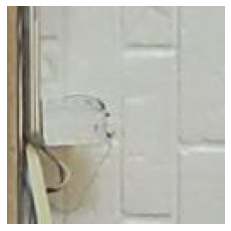

[1. 0. 0. 0.]


In [0]:
# picking a test sample before generating adversarial examples 
Image = X[ 0, :]
print( Image.shape )
r,g,b = cv2.split(Image)       # get b,g,r
Image = cv2.merge([r,g,b])

plt.imshow( Image.astype('uint8') )
plt.axis( 'off' )
plt.show( )
print(Y[0])

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import RMSprop
from keras import optimizers
import glob
import pandas as pd
import os
import shutil 
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline

Using TensorFlow backend.


In [0]:
modelSigmoid = Sequential()
modelSigmoid.add(Conv2D(32, (3, 3), input_shape=(128,128,3)))
modelSigmoid.add(Activation('relu'))
modelSigmoid.add(MaxPooling2D(pool_size=(2, 2)))

modelSigmoid.add(Conv2D(32, (3, 3)))
modelSigmoid.add(Activation('relu'))
modelSigmoid.add(MaxPooling2D(pool_size=(2, 2)))

modelSigmoid.add(Conv2D(64, (3, 3)))
modelSigmoid.add(Activation('relu'))
modelSigmoid.add(MaxPooling2D(pool_size=(2, 2)))

modelSigmoid.add(Flatten())
modelSigmoid.add(Dense(64))
modelSigmoid.add(Activation('relu'))
modelSigmoid.add(Dropout(0.5))
modelSigmoid.add(Dense(4))
modelSigmoid.add(Activation('sigmoid'))

modelSigmoid.compile(optimizer=optimizers.RMSprop(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

modelSigmoid.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)       

In [0]:
# RMSprop ###(lr = 0.001 -> [23.8N, 23.8N, 26.19N])###(lr = 0.0001 -> [64.99GG, 52.79OG, 47.99OG])###(lr = 0.00001 -> [25.0N, 24.6N, 25.79N])###
# Adam ###(lr = 0.001 -> [23.8N, 23.8N, 23.8N])###(lr = 0.0001 -> [23.8N, 23.8N, 24.79N])###(lr = 0.00001 -> [23.8N, 23.8N, 23.8N])###
# SGD ###(lr = 0.001 -> [23.8N, 23.8N, 23.8N])###(lr = 0.0001 -> [21.79N, 32.4N, 23.8N])###(lr = 0.00001 -> [23.8N, 23.8N, 23.99N])###
# N = No learning, GG = Great Learning, OG = Okay Learning, U = Unlearning

#RMSprop lr = 0.0001          ### 70.99% (RMSprop, lr = 0.0001, f1 = 0.668754) ###

modelSigmoid.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

Train on 5254 samples, validate on 500 samples
Epoch 1/10


KeyboardInterrupt: ignored

In [0]:
modelSigmoid.evaluate(x_test, y_test)

In [0]:
# predict probabilities for test set
yhat_probs_Sigmoid = modelSigmoid.predict(x_test, verbose=0)
# predict crisp classes for test set
yhat_classes_Sigmoid = modelSigmoid.predict_classes(x_test, verbose=0)
yhat_probs_Sigmoid = np.argmax(yhat_probs_Sigmoid, axis=1)
print(yhat_probs_Sigmoid.shape)
print(yhat_classes_Sigmoid.shape)

In [0]:
print(y_test.shape)
y_test_Sigmoid = np.argmax(y_test, axis=1)
print(y_test_Sigmoid.shape)

In [0]:
# accuracy: (tp + tn) / (p + n)
accuracy_Sigmoid = accuracy_score(y_test_Sigmoid, yhat_classes_Sigmoid)
print('Accuracy Sigmoid: %f' % accuracy_Sigmoid)
# precision tp / (tp + fp)
precision_Sigmoid = precision_score(y_test_Sigmoid, yhat_classes_Sigmoid, average='macro')
print('Precision Sigmoid: %f' % precision_Sigmoid)
# recall: tp / (tp + fn)
recall_Sigmoid = recall_score(y_test_Sigmoid, yhat_classes_Sigmoid, average='macro')
print('Recall Sigmoid: %f' % recall_Sigmoid)
# f1: 2 tp / (2 tp + fp + fn)
f1_Sigmoid = f1_score(y_test_Sigmoid, yhat_classes_Sigmoid, average='macro')
print('F1 score Sigmoid: %f' % f1_Sigmoid)

In [0]:
modelSoftmax = Sequential()
modelSoftmax.add(Conv2D(32, (3, 3), input_shape=(128,128,3)))
modelSoftmax.add(Activation('relu'))
modelSoftmax.add(MaxPooling2D(pool_size=(2, 2)))

modelSoftmax.add(Conv2D(32, (3, 3)))
modelSoftmax.add(Activation('relu'))
modelSoftmax.add(MaxPooling2D(pool_size=(2, 2)))

modelSoftmax.add(Conv2D(64, (3, 3)))
modelSoftmax.add(Activation('relu'))
modelSoftmax.add(MaxPooling2D(pool_size=(2, 2)))

modelSoftmax.add(Flatten())
modelSoftmax.add(Dense(64))
modelSoftmax.add(Activation('relu'))
modelSoftmax.add(Dropout(0.5))
modelSoftmax.add(Dense(4))
modelSoftmax.add(Activation('softmax'))

modelSoftmax.compile(optimizer=optimizers.Adam(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

modelSoftmax.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)       

In [0]:
# RMSprop ###(lr = 0.001 -> [23.8N, 23.8N, 23.8N])###(lr = 0.0001 -> [23.8N, 23.8N, 23.8N])###(lr = 0.00001 -> [34.79NOG, 41.2N, 33.79N])###
# Adam ###(lr = 0.001 -> [23.8N, 23.8N, 23.8N])###(lr = 0.0001 -> [23.8N, 23.8N, 23.8N])###(lr = 0.00001 -> [46.99N, 43.59NOG, 62.99GG])###
# SGD ###(lr = 0.001 -> [58.39GG, 32.6NOG, 49.79OG])###(lr = 0.0001 -> [48.19OG, 42.8NOG, 36.39N])###(lr = 0.00001 -> [34.4NOG, 55.59OG, 46.0NOG])###
# N = No learning, GG = Great Learning, OG = Okay Learning, U = Unlearning

#Adam lr = 0.00001        ### 50.59% (Adam, lr = 0.00001, f1 = 0.481527) ###

modelSoftmax.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

Train on 5254 samples, validate on 500 samples
Epoch 1/10
5254/5254 [==============================] - 4s 671us/step - loss: 12.2208 - accuracy: 0.2790 - val_loss: 1.2339 - val_accuracy: 0.4140
Epoch 2/10
5254/5254 [==============================] - 3s 577us/step - loss: 1.3224 - accuracy: 0.3352 - val_loss: 1.2147 - val_accuracy: 0.4180
Epoch 3/10
5254/5254 [==============================] - 3s 582us/step - loss: 1.2673 - accuracy: 0.3460 - val_loss: 1.1713 - val_accuracy: 0.4140
Epoch 4/10
5254/5254 [==============================] - 3s 585us/step - loss: 1.2255 - accuracy: 0.3496 - val_loss: 1.1043 - val_accuracy: 0.4700
Epoch 5/10
5254/5254 [==============================] - 3s 588us/step - loss: 1.1988 - accuracy: 0.3588 - val_loss: 1.0754 - val_accuracy: 0.4560
Epoch 6/10
5254/5254 [==============================] - 3s 580us/step - loss: 1.1848 - accuracy: 0.3666 - val_loss: 1.0396 - val_accuracy: 0.4720
Epoch 7/10
5254/5254 [==============================] - 3s 580us/step - loss

In [0]:
modelSoftmax.evaluate(x_test, y_test)

500/500 [==============================] - 0s 772us/step


[0.9645424032211304, 0.5059999823570251]

In [0]:
# predict probabilities for test set
yhat_probs_Softmax = modelSoftmax.predict(x_test, verbose=0)
# predict crisp classes for test set
yhat_classes_Softmax = modelSoftmax.predict_classes(x_test, verbose=0)
yhat_probs_Softmax = np.argmax(yhat_probs_Softmax, axis=1)
print(yhat_probs_Softmax.shape)
print(yhat_classes_Softmax.shape)

(500,)
(500,)


In [0]:
print(y_test.shape)
y_test_Softmax = np.argmax(y_test, axis=1)
print(y_test_Softmax.shape)

(500, 4)
(500,)


In [0]:
# accuracy: (tp + tn) / (p + n)
accuracy_Softmax = accuracy_score(y_test_Softmax, yhat_classes_Softmax)
print('Accuracy Softmax: %f' % accuracy_Softmax)
# precision tp / (tp + fp)
precision_Softmax = precision_score(y_test_Softmax, yhat_classes_Softmax, average='macro')
print('Precision Softmax: %f' % precision_Softmax)
# recall: tp / (tp + fn)
recall_Softmax = recall_score(y_test_Softmax, yhat_classes_Softmax, average='macro')
print('Recall Softmax: %f' % recall_Softmax)
# f1: 2 tp / (2 tp + fp + fn)
f1_Softmax = f1_score(y_test_Softmax, yhat_classes_Softmax, average='macro')
print('F1 score Softmax: %f' % f1_Softmax)

Accuracy Softmax: 0.506000
Precision Softmax: 0.491564
Recall Softmax: 0.491633
F1 score Softmax: 0.481527
